## Moduli

In [16]:
# Importa moduli
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import math

In [17]:
# Stile dei grafici
plt.style.use(['science', 'notebook', 'grid'])

## Variabili globali

In [18]:
# Vettore degli 1/N
N_min = 10
N_max = 100
step = 10
one_over_N = [1/n for n in range(N_min, N_max + step, step)]
print(one_over_N)

[0.1, 0.05, 0.03333333333333333, 0.025, 0.02, 0.016666666666666666, 0.014285714285714285, 0.0125, 0.011111111111111112, 0.01]


## Lettura file di testo

In [19]:
scarto_trapezio = []

with open('scarto_trapezio.txt', 'r') as f:
    while True:
        line = f.readline()
        line = line.strip()
        if not line:
            break
        scarto_trapezio.append(float(line))
        
print(scarto_trapezio)

[8.8976464586e-05, 2.2044669273e-05, 7.383690062e-06, 1.798591206e-06, 9.1906816e-07, 2.443601037e-06, 3.383199129e-06, 4.002570779e-06, 4.432051545e-06, 4.741875446e-06]


In [20]:
scarto_simpson = []

with open('scarto_simpson.txt', 'r') as f:
    while True:
        line = f.readline()
        line = line.strip()
        if not line:
            break
        scarto_simpson.append(float(line))

print(scarto_simpson)

[0.000269620359296, 0.000156088313544, 0.000112114412927, 8.8383812091e-05, 7.3439990215e-05, 6.3134113468e-05, 5.5584803515e-05, 4.9811035075e-05, 4.5249613737e-05, 4.1553544486e-05]


## Plot trapezio (scarto dal valore analitico dell'integrale in funzione di 1/N)

In [21]:
x_min = 0.01
x_max = 0.1
points = 1000
x_lin = np.linspace(x_min, x_max, points)
x = np.array(one_over_N)
y = np.array(scarto_trapezio)

In [22]:
# Estrazione dei parametri con fit lineare
x_lin_log = np.log10(x_lin)
x_log = np.log10(x)
y_log = np.log10(y)

m, b = np.polyfit(x_log, y_log, 1)
print("Coefficiente angolare: " + str(m))
print("Quota: " + str(b))

Coefficiente angolare: 1.320378143890623
Quota: -3.0913466619049057


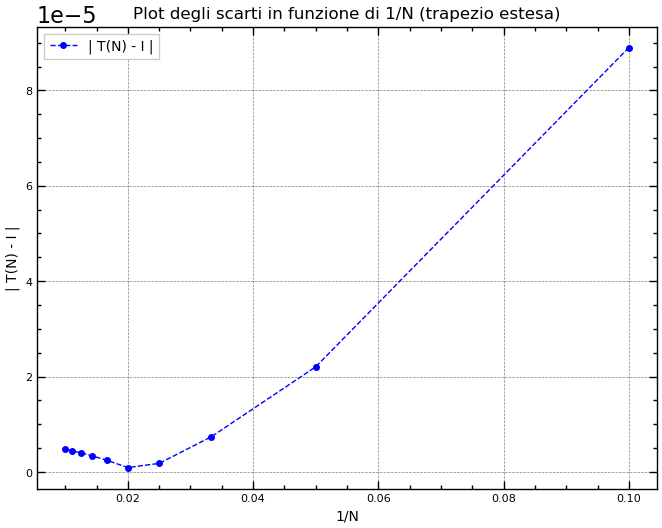

In [23]:
plt.title('Plot degli scarti in funzione di 1/N (trapezio estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| T(N) - I |', fontsize=10) # Asse y

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('trapezio_grafico.png', dpi=200)
plt.show()

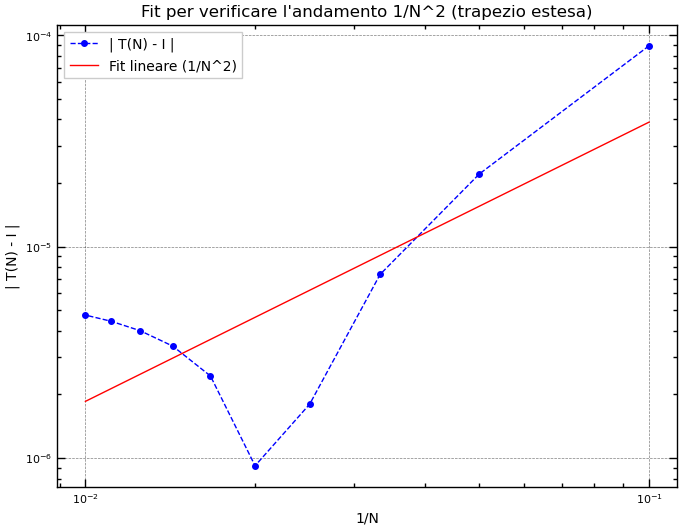

In [24]:
plt.title('Fit per verificare l\'andamento 1/N^2 (trapezio estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| T(N) - I |', fontsize=10) # Asse y
plt.xscale('log')
plt.yscale('log')

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')
plt.plot(x_lin, 10**(m*x_lin_log + b), '-', color='red', lw=1.0, ms=4, label='Fit lineare (1/N^2)')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('trapezio_grafico_fit.png', dpi=200)
plt.show()

## Plot Simpson (scarto dal valore analitico dell'integrale in funzione di 1/N)

In [25]:
x = np.array(one_over_N)
y = np.array(scarto_simpson)

In [26]:
# Estrazione dei parametri con fit lineare
x_log = np.log(x)
y_log = np.log(y)

m, q = np.polyfit(x_log, y_log, 1)
print("Coefficiente angolare: " + str(m))
print("Quota: " + str(b))

Coefficiente angolare: 0.8160338705173092
Quota: -3.0913466619049057


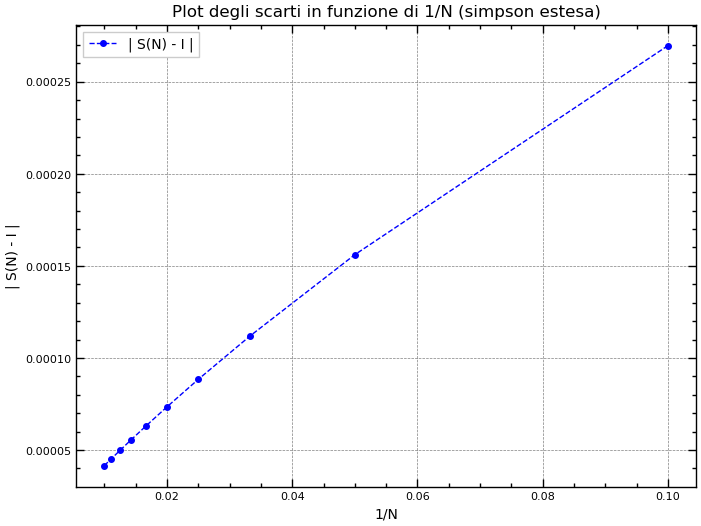

In [27]:
plt.title('Plot degli scarti in funzione di 1/N (simpson estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| S(N) - I |', fontsize=10) # Asse y

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| S(N) - I |')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('simpson_grafico.png', dpi=200)
plt.show()

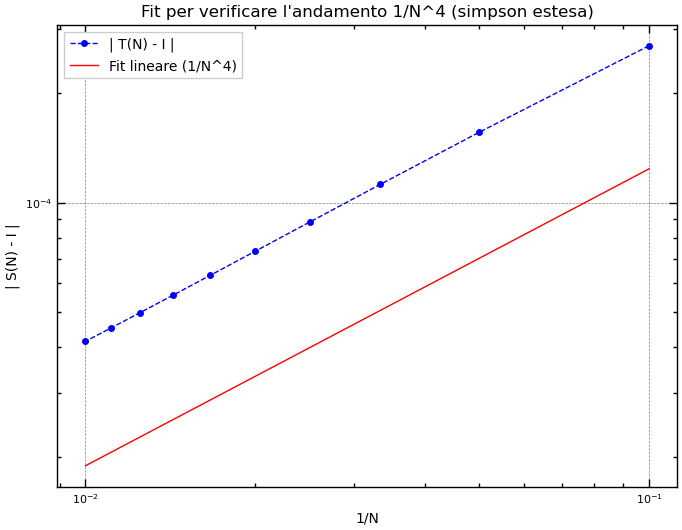

In [28]:
plt.title('Fit per verificare l\'andamento 1/N^4 (simpson estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| S(N) - I |', fontsize=10) # Asse y
plt.xscale('log')
plt.yscale('log')

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')
plt.plot(x_lin, 10**(m*x_lin_log + b), '-', color='red', lw=1.0, ms=4, label='Fit lineare (1/N^4)')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('simpson_grafico_fit.png', dpi=200)
plt.show()